In [1]:
# Numerical Operations
import numpy as np
import pandas as pd  

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# Auto EDA
import pandas_profiling



# Import Data 

In [2]:
claims=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\claims.csv')
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust_demo=pd.read_csv(r'C:\Users\Deepika\Downloads\PYTHON\cust_demographics.csv')
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
#1 combining the two data based on Customer ID
f_data=pd.merge(left=cust_demo,right=claims,how='inner',left_on='CUST_ID',right_on='customer_id')
f_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


# 2 Data Audit

In [5]:
# checking the details of the data
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [6]:
# checking the data types for each feature
f_data.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [7]:
# checking the missing value
f_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [8]:
# checking non missing values 
(~f_data.isna()).sum()


CUST_ID                1085
gender                 1085
DateOfBirth            1085
State                  1085
Contact                1085
Segment                1085
claim_id               1085
customer_id            1085
incident_cause         1085
claim_date             1085
claim_area             1085
police_report          1085
claim_type             1085
claim_amount           1020
total_policy_claims    1075
fraudulent             1085
dtype: int64

In [9]:
# checking the shape of the data
f_data.shape

(1085, 16)

In [10]:
# checking the percentage of missing value
f_data.isna().sum() / f_data.shape[0]

CUST_ID                0.000000
gender                 0.000000
DateOfBirth            0.000000
State                  0.000000
Contact                0.000000
Segment                0.000000
claim_id               0.000000
customer_id            0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount           0.059908
total_policy_claims    0.009217
fraudulent             0.000000
dtype: float64

# Data Cleaning

In [11]:
# Date format for date of birth and claim date
f_data.DateOfBirth=pd.to_datetime(f_data.DateOfBirth,format='%d-%b-%y')

In [12]:
f_data.claim_date=pd.to_datetime(f_data.claim_date,format='%m/%d/%Y')

In [13]:
# converting the contact into numeric
f_data.Contact=pd.to_numeric(f_data.Contact.str.replace("-",""))

In [14]:
#3 converting the claim amount into numeric
f_data.claim_amount=pd.to_numeric(f_data.claim_amount.str.replace("$",""))

In [15]:
# now again checking the data types to verify wheather the  all the conversion is done or not
f_data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [16]:
# 4]  created alert flag with unknown=1 and others ine yes and no=1 by police report using np.where condition
# then deleted the police report column

f_data['alert_flag']=np.where(f_data.police_report=='Unknown',1,0)
f_data=f_data.drop(columns=['police_report'])
f_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,75740424,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,0
1081,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067,42364152,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,0
1083,11256802,Female,2064-10-22,LA,4693455617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0


In [17]:
#5] to get most recent observation used first() by grouping customer id
# and checking the duplicate

f_data=f_data.groupby('CUST_ID').first().reset_index()
f_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0
1,263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1
3,441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,0
4,524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,0
1074,99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,0
1075,99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,0
1076,99892000,Male,1995-06-08,OR,3952466172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,0


In [18]:
f_data.CUST_ID.duplicated().sum() # here we observe the customer id is unique that there is no duplicate records

0

In [19]:
# 6] checking again missing values because lots of changes done in the data

f_data.isna().sum()


CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
alert_flag              0
dtype: int64

In [20]:
con_col=["claim_amount","total_policy_claims"]

In [21]:
# Missing Value treatment

missing_imputer={}
for i in f_data:
    if i==con_col:
        missing_imputer[i] = f_data[i].mean()
    else:
        missing_imputer[i] = f_data[i].mode()[0]
        

missing_imputer

{'CUST_ID': 154557,
 'gender': 'Male',
 'DateOfBirth': Timestamp('1969-01-01 00:00:00'),
 'State': 'NY',
 'Contact': 1233462854,
 'Segment': 'Gold',
 'claim_id': 26832,
 'customer_id': 154557,
 'incident_cause': 'Other causes',
 'claim_date': Timestamp('2018-01-13 00:00:00'),
 'claim_area': 'Auto',
 'claim_type': 'Material only',
 'claim_amount': 1630.0,
 'total_policy_claims': 1.0,
 'fraudulent': 'No',
 'alert_flag': 0}

In [22]:
f_data = f_data.fillna(missing_imputer)
f_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,1630.0,1.0,Yes,0
1,263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1
3,441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,0
4,524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,0
1074,99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,0
1075,99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,0
1076,99892000,Male,1995-06-08,OR,3952466172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,0


In [23]:
f_data['Age']=f_data.DateOfBirth.apply(lambda x: int((dt.datetime.now()-x).days/365))


In [24]:
f_data['Age_group']=np.where(f_data.Age<=18,'Children',np.where((f_data.Age>18)&(f_data.Age<=30),'Youth',np.where((f_data.Age>30)&(f_data.Age<=60),'Adult','Senior')))

In [25]:
f_data=f_data.drop(columns=['Age'])
f_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age_group
0,154557,Female,1978-05-23,DE,9628791238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,Injury only,1630.0,1.0,Yes,0,Adult
1,263204,Male,1972-12-20,TX,1738926314,Silver,40953049,263204,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0,Adult
2,287476,Male,1988-07-28,FL,3645981549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,1,Adult
3,441097,Male,1971-08-19,CA,1873488375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,0,Adult
4,524545,Female,1980-08-10,NC,7988625398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,5175624916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,0,Children
1074,99723844,Female,2066-06-19,HI,4577521374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,0,Children
1075,99761663,Female,2063-11-18,NC,6432464718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,0,Children
1076,99892000,Male,1995-06-08,OR,3952466172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,0,Youth


# EDA

In [26]:
#8] calculating averge amount claimed by customers for various segements
# used group by
avg_amt_of_segment=f_data.groupby(by=['CUST_ID','Segment'])[['claim_amount']].mean()
avg_amt_of_segment

,,claim_amount
CUST_ID,Segment,
154557,Platinum,1630.0
263204,Silver,39192.0
287476,Silver,1621.5
441097,Gold,37040.0
524545,Gold,35250.0
...,...,...
99674324,Silver,21480.0
99723844,Gold,14360.0
99761663,Silver,1242.0


In [27]:
#9] firstly finding atleast 20 days prior to 1st October 2018 and then filtering then group by incident cause
end_date='1st October, 2018'
end_date=pd.to_datetime(end_date)
days_before=end_date-pd.Timedelta(days=20)
prior=f_data.loc[(f_data.claim_date <= end_date) & (f_data.claim_date >= days_before),:]
prior.groupby(by=['incident_cause','claim_date'])[['claim_amount']].sum()


claim_amount
incident_cause     claim_date              
Crime              2018-09-19        3890.0
                   2018-09-26        2950.0
Driver error       2018-09-12        2130.0
                   2018-09-26        1630.0
Natural causes     2018-09-12        7268.0
                   2018-09-19        1150.0
Other causes       2018-09-12       75122.0
                   2018-09-19       94832.0
                   2018-09-26       64192.0
Other driver error 2018-09-12        2710.0
                   2018-09-19       42449.5
                   2018-09-26        2440.0

In [28]:
#10] firstly filtered with respect to state and incident cause 
#then again filtered by age group and the grouped by state and age group to know the count of incident cause
state_cause=f_data.loc[((f_data.State=='TX')| (f_data.State=='DE')| (f_data.State=='AK')) & ((f_data.incident_cause=='Driver error') |(f_data.incident_cause.str.lower().str.contains('driver'))),:]
state_cause_adult=state_cause.loc[(state_cause.Age_group=='Adult')]
state_cause_adult.groupby(by=['State','Age_group'])['incident_cause'].count()

State  Age_group
AK     Adult        7
DE     Adult        8
TX     Adult        7
Name: incident_cause, dtype: int64

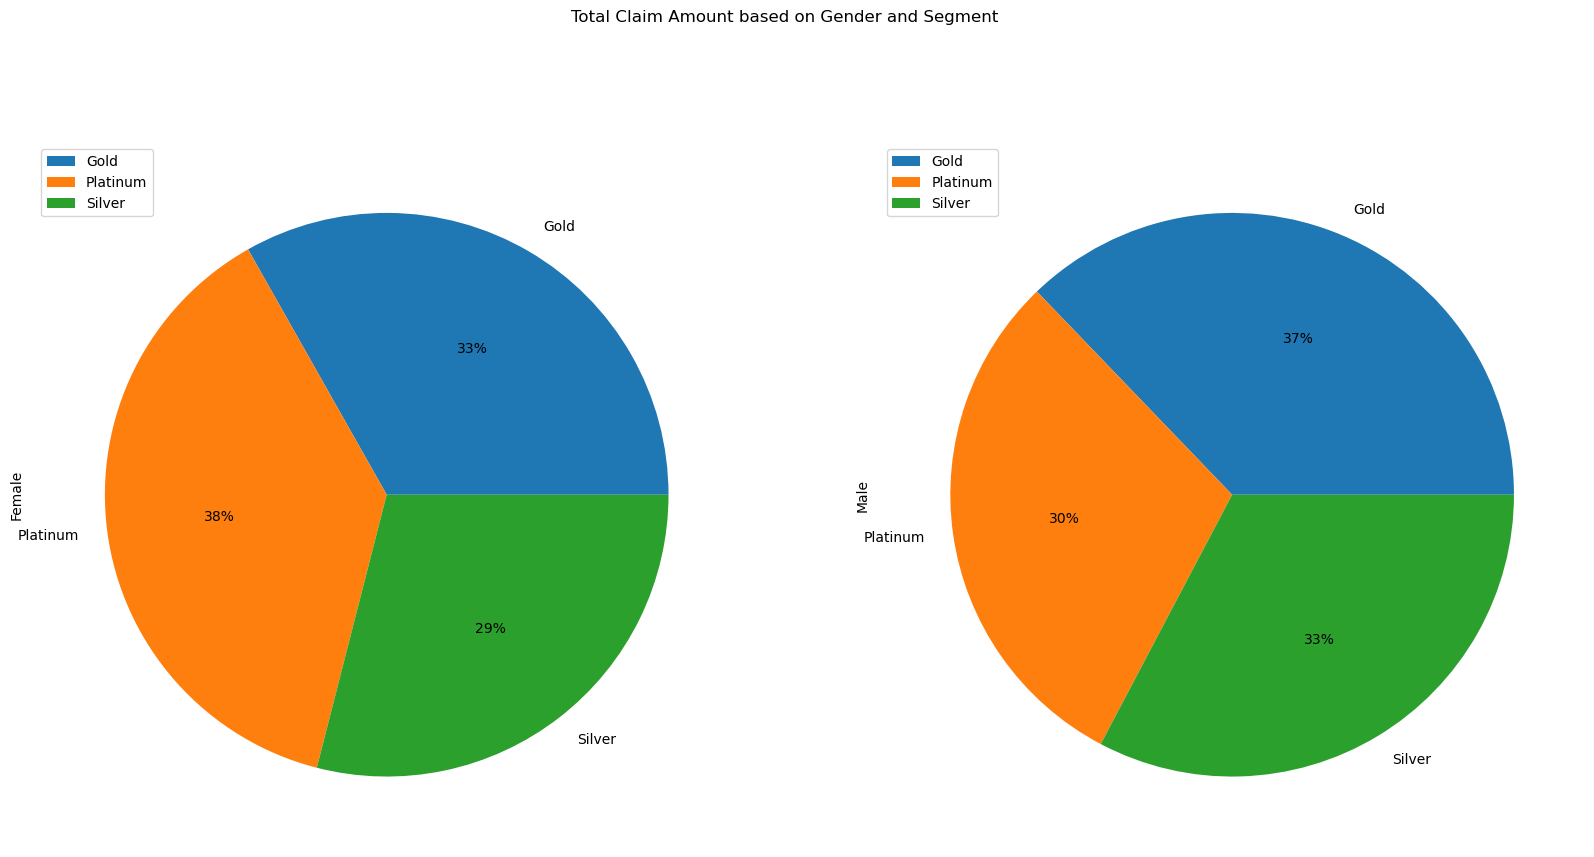

In [29]:
#11] 
total_amt_gs_wise=f_data.pivot_table(index='Segment',columns='gender',values='claim_amount',aggfunc=sum)
total_amt_gs_wise.plot(kind='pie',subplots=True,autopct="%1.0f%%",figsize=[20,10],title='Total Claim Amount based on Gender and Segment')
plt.show()


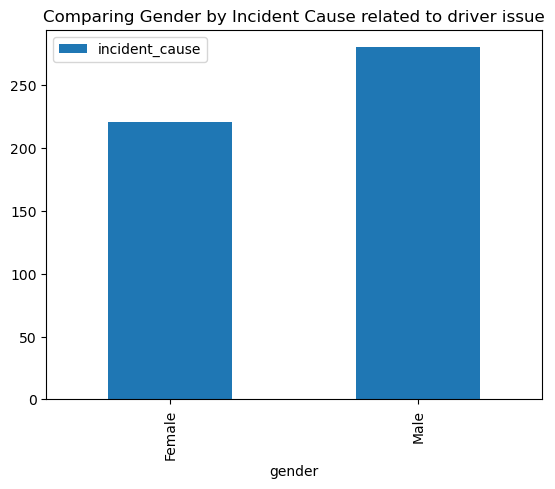

In [30]:
#12] 
filter_cause=f_data.loc[(f_data.incident_cause=='Driver error') | (f_data.incident_cause.str.lower().str.contains('driver')),:]
filter_cause=filter_cause.groupby(by=['gender'])[['incident_cause']].count()
filter_cause.plot(kind='bar',title='Comparing Gender by Incident Cause related to driver issue')
plt.show()

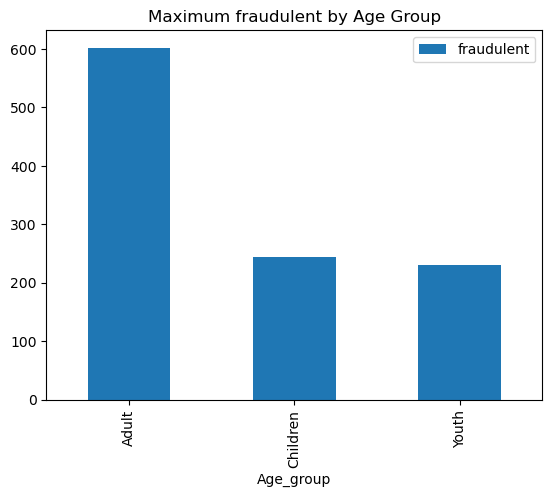

In [31]:
#13] 
f_data.groupby(by=['Age_group'])[['fraudulent']].count().plot(kind='bar',title='Maximum fraudulent by Age Group')
plt.show()

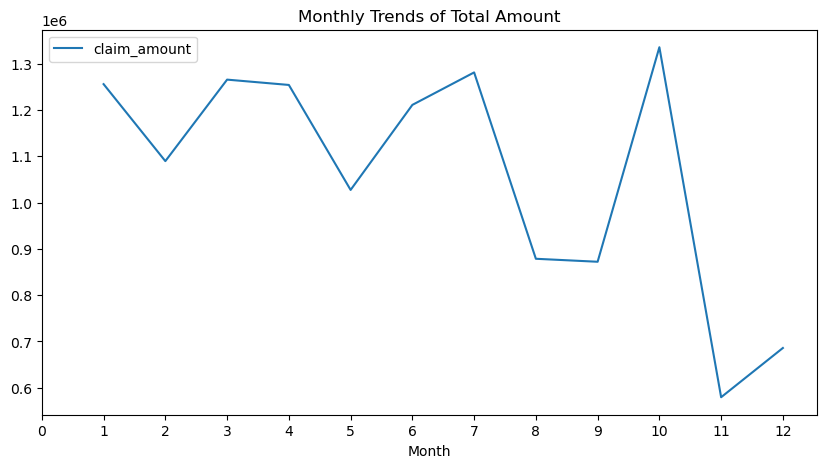

In [32]:
#14] 
f_data['Month']=f_data.claim_date.apply(lambda x:x.month)
f_data.groupby(by=['Month'])[['claim_amount']].sum().plot(kind='line',title='Monthly Trends of Total Amount',xticks=range(0,13),figsize=[10,5])
plt.show()


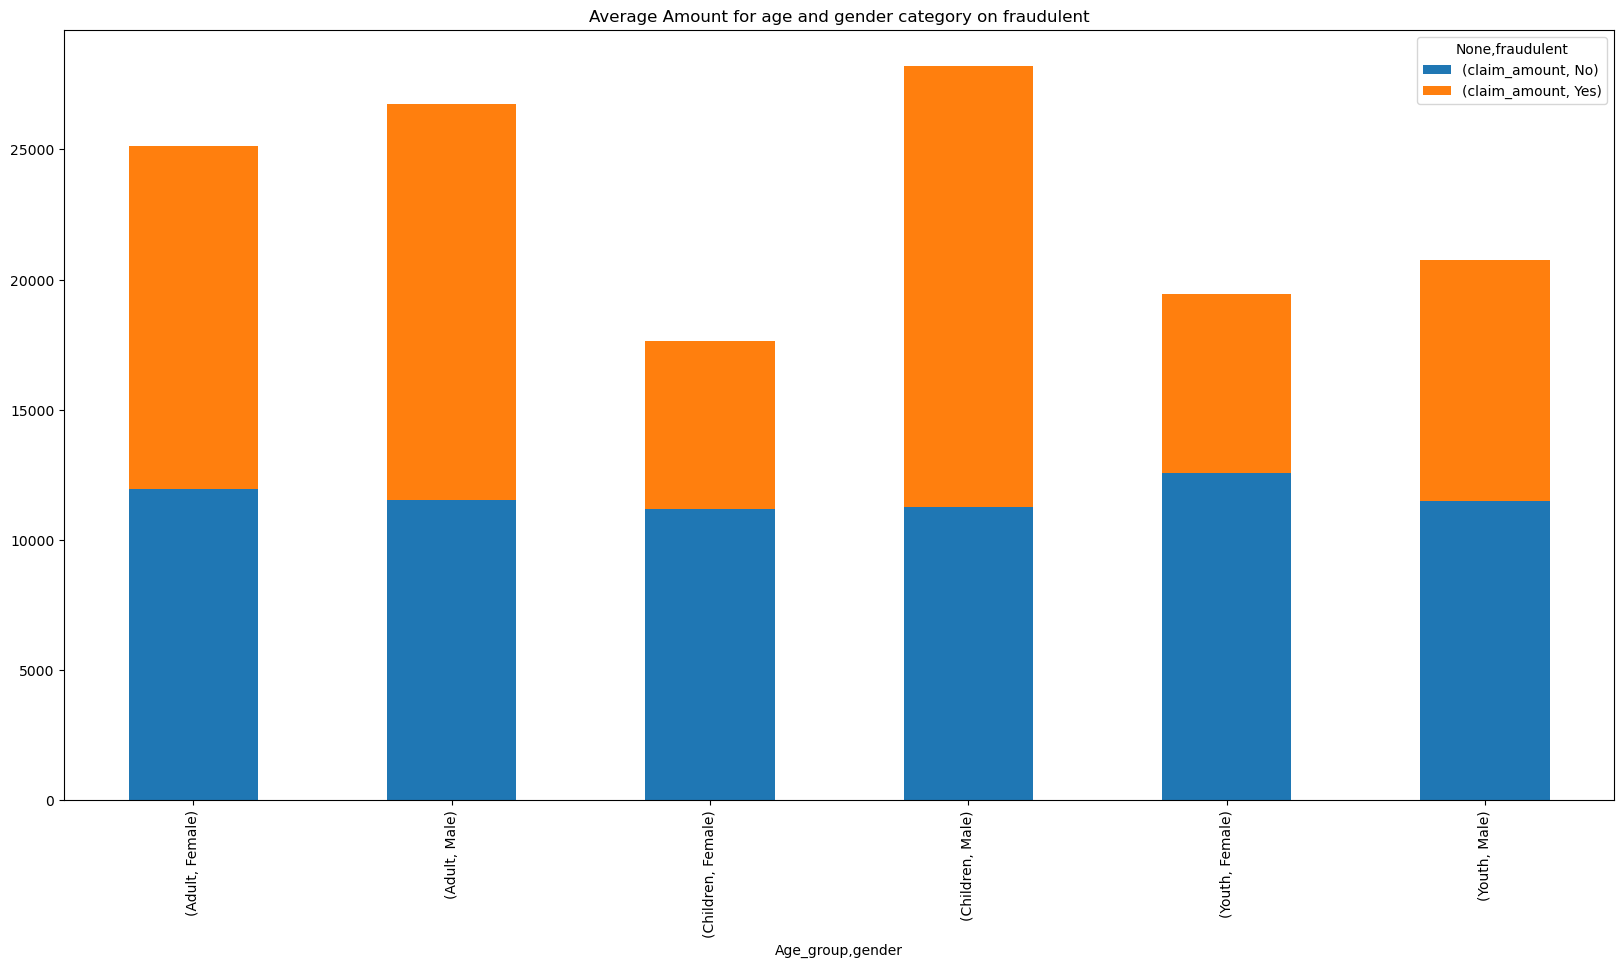

In [33]:
#15] 
f_data.groupby(by=['Age_group','gender','fraudulent'])[['claim_amount']].mean().unstack().plot(kind='bar',stacked=True,figsize=[20,10],title='Average Amount for age and gender category on fraudulent')
plt.show()

# Statistical Analysis

In [34]:
import scipy.stats as stats

#16] Comparing the two samples that is females and males so applying Independence Test to check whether there is a similarity(no difference) or not(difference)



In [35]:
# obtaining the two samples
male_claim=f_data['claim_amount'].loc[(f_data.gender=='Male')]
female_claim=f_data['claim_amount'].loc[(f_data.gender=='Female')]


In [36]:
stats.ttest_ind(male_claim,female_claim)

Ttest_indResult(statistic=0.7340258859910578, pvalue=0.46309287415559464)

#### Conclusion

#17] Checking the relationship between two categories i.e segment and age group so applying Chi-square Test


In [37]:
# obtaining cross tables
cross_tb=pd.crosstab(f_data.Segment,f_data.Age_group,margins=True)
cross_tb

Age_group,Adult,Children,Youth,All
Segment,,,,
Gold,216,81,74,371
Platinum,199,83,79,361
Silver,187,81,78,346
All,602,245,231,1078


In [38]:
stats.chi2_contingency(cross_tb)

(1.437854057425256,
 0.9975820760546136,
 9,
 array([[ 207.18181818,   84.31818182,   79.5       ,  371.        ],
        [ 201.5974026 ,   82.04545455,   77.35714286,  361.        ],
        [ 193.22077922,   78.63636364,   74.14285714,  346.        ],
        [ 602.        ,  245.        ,  231.        , 1078.        ]]))

###### Conclusion

#18] Comparing the current year to 2016-17 year for verifying that there is a significantly rise in claim amount with fiscal average 10000 so applying t test

In [39]:
# creating a year column from claim date
f_data['Year']=f_data.claim_date.apply(lambda x:x.year)


In [40]:
# obtaining two samples
current_yr=f_data.loc[(f_data.Year==2018)]['claim_amount']


In [41]:
stats.ttest_1samp(current_yr,popmean=10000)

Ttest_1sampResult(statistic=3.0576736900214305, pvalue=0.0023551392195992325)

###### Conclusion

#19] Checking whether there is difference between age groups and total ploicy claims so applying f test 

In [42]:
# obtaining a samples
age_grp1=f_data.loc[(f_data.Age_group=='Children')]['claim_id']
age_grp2=f_data.loc[(f_data.Age_group=='Youth')]['claim_id']
age_grp3=f_data.loc[(f_data.Age_group=='Adult')]['claim_id']


In [43]:
stats.f_oneway(age_grp1,age_grp2,age_grp3)

F_onewayResult(statistic=5.269789264089147, pvalue=0.0052784452086505835)

###### Conclusion

#20] Checking whether there is a relationship between claim amount and total policy claim so applying Correlation test

In [44]:
stats.pearsonr(f_data.claim_amount,f_data.total_policy_claims)

PearsonRResult(statistic=-0.01290162573531549, pvalue=0.6722047320679887)

##### Conclusion